<a href="https://colab.research.google.com/github/842Mono/CSEN1067_Machine_Learning_Project1/blob/master/Project2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

from time import time
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from array import *



##**Task 1**

In [77]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(funneled=True,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# print(h,w)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
X = preprocessing.StandardScaler().fit_transform(X)
# print(X)

n_features = X.shape[1]
# print(X.shape)
# print(n_features)

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# print(y)
# print(y.shape)
# print(target_names)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# #############################################################################
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)



In [8]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
# print(pca)


print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))
print("eigenfaces = ",eigenfaces.shape)
# print("eigenfaces = ",eigenfaces[0])

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')


print("Done.....")

Extracting the top 150 eigenfaces from 966 faces
done in 0.440s
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
done in 0.036s
Done.....


In [10]:
#task 1-part 1
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1, 10, 100, 1e3],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Done.....")




Fitting the classifier to the training set
done in 59.308s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


In [11]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print("-------")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

print("Done.....")

Predicting people's names on the test set
done in 0.081s
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.94      0.90      0.92       146
Gerhard Schroeder       0.75      0.84      0.79        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.85      0.78      0.81        36

      avg / total       0.85      0.84      0.84       322

-------
[[  9   0   2   2   0   0   0]
 [  2  52   2   2   1   1   0]
 [  2   3  20   2   0   0   0]
 [  1   6   1 132   3   1   2]
 [  0   2   0   1  21   0   1]
 [  0   2   0   1   1   9   2]
 [  0   4   1   1   2   0  28]]
Done.....


In [12]:
# Task 1-part 2
# # Create the Scaler object
X_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
# # Fit your data on the scaler object
scaled_df = X_scaler.fit_transform(X_train)
#print(scaled_df)

print("Fitting the classifier to the training set")
t0 = time()
param_grid_SVC = {'C': [1, 10, 100, 1e3],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_SVC = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                           param_grid_SVC, cv=5)

clf_SVC = clf_SVC.fit(scaled_df, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf_SVC.best_estimator_)
print("Done.....")

Fitting the classifier to the training set
done in 671.814s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


In [51]:
# ##################### task1-part 3 ########################
# # # 50, 150, 190, 300, 700

# n_components =  [50, 150, 190, 300, 700]
# c_array = []
# train_set = []
# average =[]
# eigenfaces_array = []
# predict_array = []

# for i in range(len(n_components)):
#   print("Extracting the top %d eigenfaces from %d faces"
#         % (n_components[i], X_train.shape[0]))
#   t0 = time()
#   pca = PCA(n_components = n_components[i], svd_solver='randomized',
#             whiten=True).fit(X_train)
#   # print(pca)
#   #print("done in %0.3fs" % (time() - t0))
#   sum_all=0
#   match=0
  
#   eigenfaces = pca.components_.reshape((n_components[i], h, w))
#   print("eigenfaces = ",eigenfaces.shape)
#   eigenfaces_array.append(eigenfaces)
#   # print("eigenfaces = ",eigenfaces[0])

#   print("Projecting the input data on the eigenfaces orthonormal basis")
#   t0 = time()
#   x_train_pca = pca.transform(X_train)
# #   train_set.append(x_train_pca)
# #   print("x_train_pca",len(x_train_pca))
#   x_test_pca = pca.transform(X_test)
# #   print("done in %0.3fs" % (time() - t0))
# #   print("x_test_pca",len(x_test_pca))
 
  
#   t0 = time()
#   param_grid = {'C': [1, 10, 100, 1e3],
#                 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
#   clf_new = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                              param_grid, cv=5)
  
#   clf_new = clf_new.fit(x_train_pca, y_train)
  
#   y_pred_new = clf_new.predict(x_test_pca)
#   predict_array.append(y_pred_new)
# #   print("y_pred_new",len(y_pred_new))
# #   print("y_test",len(y_test))
  
#   #calculate accuracy
#   for ii in range(0,len(y_pred_new)):
#     sum_all=len(y_pred_new)
#     if y_pred_new[ii]==y_test[ii]:
#       match+=1
#   average.append(match/sum_all) 
#   print("average :",average)
  
 
  
#   print("done in %0.3fs" % (time() - t0))
#   print("Best estimator found by grid search:")
# #   print(clf.best_estimator_)
#   c_value = clf_new.best_estimator_.C
#   c_array.append(c_value)
#   print(c_value)
# print("c_array",c_array)
# # print("train_set",train_set)
# # print('clf_new : ',clf_new)
# print("Done.....")



Extracting the top 50 eigenfaces from 966 faces
eigenfaces =  (50, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336]
done in 20.386s
Best estimator found by grid search:
10
Extracting the top 150 eigenfaces from 966 faces
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217]
done in 59.035s
Best estimator found by grid search:
10
Extracting the top 190 eigenfaces from 966 faces
eigenfaces =  (190, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217, 0.8385093167701864]
done in 75.172s
Best estimator found by grid search:
10
Extracting the top 300 eigenfaces from 966 faces
eigenfaces =  (300, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217, 0.8385093167701864, 0.782608695652174]
done in 123.096s
Best estimator fou

In [0]:
def func_pca(Xtrain,Xtest,Ytrain,Ytest):
  n_components =  [50, 150, 190, 300, 700]
  c_array = []
  train_set = []
  average =[]
  eigenfaces_array = []
  predict_array = []

  for i in range(len(n_components)):
    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components[i], Xtrain.shape[0]))
    t0 = time()
    pca = PCA(n_components = n_components[i], svd_solver='randomized',
              whiten=True).fit(Xtrain)
    # print(pca)
    #print("done in %0.3fs" % (time() - t0))
    sum_all=0
    match=0

    eigenfaces = pca.components_.reshape((n_components[i], h, w))
#     print("eigenfaces = ",eigenfaces.shape)
    eigenfaces_array.append(eigenfaces)
    # print("eigenfaces = ",eigenfaces[0])

#     print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    x_train_pca = pca.transform(Xtrain)
    x_test_pca = pca.transform(Xtest)
  #   print("done in %0.3fs" % (time() - t0))
  #   print("x_test_pca",len(x_test_pca))


    t0 = time()
    param_grid = {'C': [1, 10, 100, 1e3],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf_new = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                               param_grid, cv=5)

    clf_new = clf_new.fit(x_train_pca, Ytrain)

    y_pred_new = clf_new.predict(x_test_pca)
    predict_array.append(y_pred_new)
  #   print("y_pred_new",len(y_pred_new))
  #   print("y_test",len(y_test))

    #calculate accuracy
    for ii in range(0,len(y_pred_new)):
      sum_all=len(y_pred_new)
      if y_pred_new[ii]==Ytest[ii]:
        match+=1
    average.append(match/sum_all) 
#     print("average :",average)



   
#     print("Best estimator found by grid search:")
  #   print(clf.best_estimator_)
    c_value = clf_new.best_estimator_.C
    c_array.append(c_value)
    print(c_value)
#   print("c_array",c_array)
#   print("average :",average)
#   print("predict_array :",predict_array)
#   print("eigenfaces_array :",eigenfaces_array)
  # print("train_set",train_set)
  # print('clf_new : ',clf_new)
  print("done in %0.3fs" % (time() - t0))
  print("Done.....")
  return n_components,c_array,average,predict_array,eigenfaces_array



In [81]:
values = func_pca(X_train, X_test, y_train, y_test)


Extracting the top 50 eigenfaces from 966 faces
10
Extracting the top 150 eigenfaces from 966 faces
1
Extracting the top 190 eigenfaces from 966 faces
10
Extracting the top 300 eigenfaces from 966 faces
10
Extracting the top 700 eigenfaces from 966 faces
10
done in 289.124s
Done.....


In [0]:
n_components = values[0]
c_array = values[1]
average = values[2]
predict_array = values[3]
eigenfaces_array = values[4]



In [83]:
print("n_components",n_components)
print("un_c_array",c_array)
print("un_average :",average)
print("un_predict_array :",predict_array)
print("un_eigenfaces_array :",eigenfaces_array)

n_components [50, 150, 190, 300, 700]
un_c_array [10, 1, 10, 10, 10]
un_average : [0.8571428571428571, 0.860248447204969, 0.8354037267080745, 0.8074534161490683, 0.6739130434782609]
un_predict_array : [array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 4, 1, 0,
       3, 0, 0, 1, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 3, 3, 3, 3, 0, 3, 6, 2, 1, 3, 5, 3, 1, 1, 1, 4, 3, 6,
       6, 4, 1, 3, 5, 6, 3, 2, 3, 2, 1, 6, 4, 4, 3, 0, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 3, 2, 1, 6, 1, 1, 6, 6, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       4, 1, 6, 4, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 3, 6, 6,
       6, 3, 3, 4, 3, 3, 0, 6, 2, 2, 5, 1, 3, 4, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 6, 0, 1, 3, 6, 5, 5, 1, 3, 1, 5, 1, 3, 3, 1, 1, 6, 1, 5, 6,
       3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 6, 3, 3, 6,
       3, 3, 5, 2, 1, 2, 3, 3, 6, 2, 1, 2, 6, 5, 3, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 1, 1, 6, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 6, 3, 3, 3, 3

2018-12-02 08:28:33,114 No handles with labels found to put in legend.


Text(0.5,1,'graph 1')

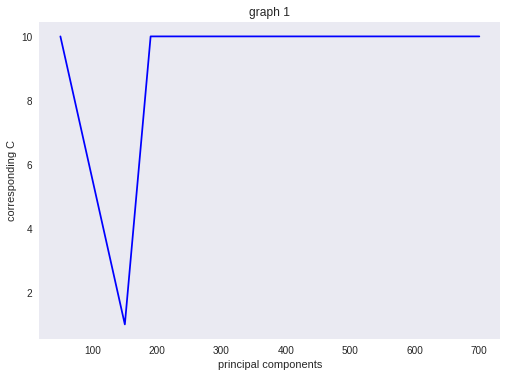

In [84]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:], c_array[:],c='b')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('corresponding C')
ax.set_title('graph 1')
  


2018-12-02 08:28:51,471 No handles with labels found to put in legend.


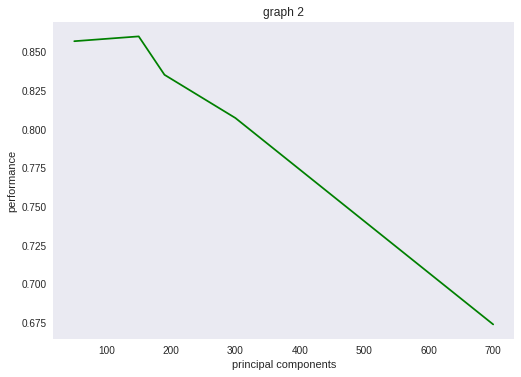

In [85]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:],average[:],c='g')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('performance')
ax.set_title('graph 2')
  
plt.show()

In [0]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)



In [0]:
for j in range(len(predict_array)):
  prediction_titles_new = [title(predict_array[j], y_test, target_names, i)
                           for i in range(predict_array[j].shape[0])]

  plot_gallery(X_test, prediction_titles_new, h, w)


In [0]:
# plot the gallery of the most significative eigenfaces
for j in range(len(eigenfaces_array)):
  eigenface_titles_new = ["eigenface %d" % i for i in range(eigenfaces[j].shape[0])]
  plot_gallery(eigenfaces_array[j], eigenface_titles_new, h, w)

plt.show()

In [67]:
#unfunneled

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

un_lfw_people = fetch_lfw_people(funneled=False,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
un_n_samples, hh, ww = un_lfw_people.images.shape


# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_un_lfw = un_lfw_people.data
X_un_lfw = preprocessing.StandardScaler().fit_transform(X_un_lfw)


un_n_features = X_un_lfw.shape[1]


# the label to predict is the id of the person
y_un_lfw = un_lfw_people.target
target_names = un_lfw_people.target_names
un_n_classes = target_names.shape[0]


print("Total dataset size:")
print("n_samples: %d" % un_n_samples)
print("n_features: %d" % un_n_features)
print("n_classes: %d" % un_n_classes)

# split into a training and testing set
un_X_train, un_X_test, un_y_train, un_y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# func_pca(un_X_train, un_X_test, un_y_train, un_y_test )

In [72]:
un_values = func_pca(un_X_train, un_X_test, un_y_train, un_y_test)


Extracting the top 50 eigenfaces from 966 faces
eigenfaces =  (50, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
Best estimator found by grid search:
10
Extracting the top 150 eigenfaces from 966 faces
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
Best estimator found by grid search:
10
Extracting the top 190 eigenfaces from 966 faces
eigenfaces =  (190, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
Best estimator found by grid search:
10
Extracting the top 300 eigenfaces from 966 faces
eigenfaces =  (300, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
Best estimator found by grid search:
10
Extracting the top 700 eigenfaces from 966 faces
eigenfaces =  (700, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
Best estimator found by grid search:
10
c_array [10, 10, 10, 10, 10]
average : [0.8478260869565217, 0.8291925465838509, 0.8354037267080745, 0.78881

In [0]:
n_components = un_values[0]
un_c_array = un_values[1]
un_average = un_values[2]
un_predict_array = un_values[3]
un_eigenfaces_array = un_values[4]



In [0]:
print("un_c_array",un_c_array)
print("un_average :",un_average)
print("un_predict_array :",un_predict_array)
print("un_eigenfaces_array :",un_eigenfaces_array)

##**Task 2**